# **House Price Prediction Regression Problem**

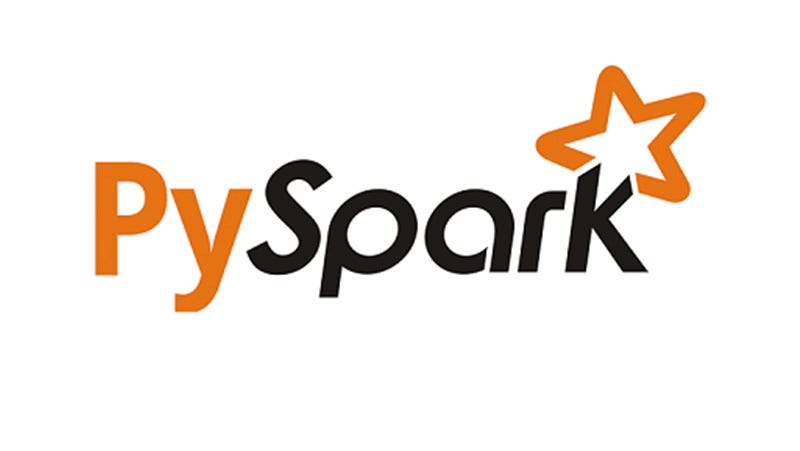

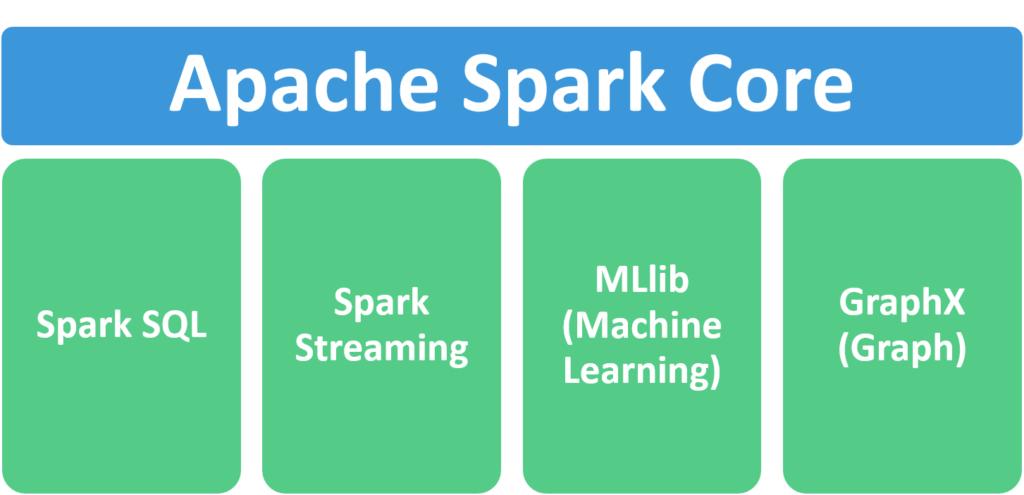

In [ ]:
# install / In Data Bricks we can skip installation, Direct import
!pip install Pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 14.8 MB/s eta 0:00:00
  Created wheel for Pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=f41d8b75fa5a95e077e3e61763024186ad1ccdf3b4db5a3a51a109c45282e51b
  Stored in directory: /root/.cache/pip/wheels/b1/59/a0/a1a0624b5e865fd389919c1a10f53aec9b12195d6747710baf
Successfully built Pyspark


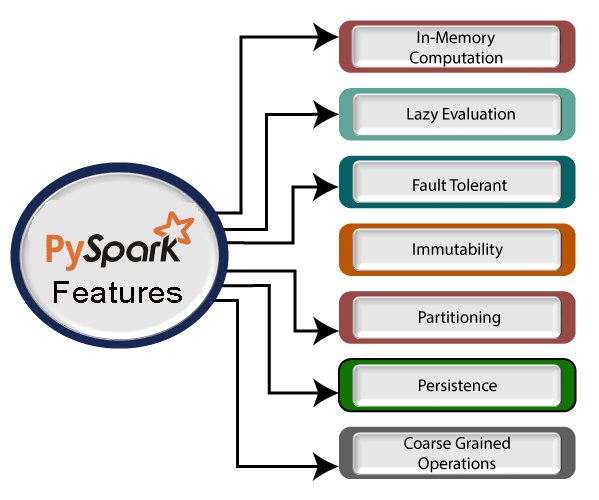

In [ ]:
# start spark session
from pyspark.sql import SparkSession

In [ ]:
spark=SparkSession.builder.getOrCreate()

In [ ]:
spark

In [ ]:
# read external data with url, we can't directly read data set from git hub in spark, we will take help of pandas
import pandas as pd
house = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Boston.csv')
house=spark.createDataFrame(house)

In [ ]:
house.show()

+------------------+----+-----+----+-----+-----+-----+------+---+-----+-------+------+-----+----+
|              CRIM|  ZN|INDUS|CHAS|   NX|   RM|  AGE|   DIS|RAD|  TAX|PTRATIO|     B|LSTAT|MEDV|
+------------------+----+-----+----+-----+-----+-----+------+---+-----+-------+------+-----+----+
|           0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296.0|   15.3| 396.9| 4.98|24.0|
|           0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242.0|   17.8| 396.9| 9.14|21.6|
|           0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242.0|   17.8|392.83| 4.03|34.7|
|0.0323699999999999| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222.0|   18.7|394.63| 2.94|33.4|
|           0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222.0|   18.7| 396.9| 5.33|36.2|
|           0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222.0|   18.7|394.12| 5.21|28.7|
|           0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311.0|   15.2| 395.6|12.43|22.9|
|           0.14455|

In [ ]:
house.printSchema()

root
 |-- CRIM: double (nullable = true)
 |-- ZN: double (nullable = true)
 |-- INDUS: double (nullable = true)
 |-- CHAS: long (nullable = true)
 |-- NX: double (nullable = true)
 |-- RM: double (nullable = true)
 |-- AGE: double (nullable = true)
 |-- DIS: double (nullable = true)
 |-- RAD: long (nullable = true)
 |-- TAX: double (nullable = true)
 |-- PTRATIO: double (nullable = true)
 |-- B: double (nullable = true)
 |-- LSTAT: double (nullable = true)
 |-- MEDV: double (nullable = true)



In [ ]:
house.columns

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [ ]:
# create vector assembler, it assemble all features in single column by seperate values with ','
from pyspark.ml.feature import VectorAssembler

In [ ]:
featureassembler= VectorAssembler(inputCols=['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT'], outputCol='Features')

In [ ]:
output = featureassembler.transform(house)

In [ ]:
output.show()

+------------------+----+-----+----+-----+-----+-----+------+---+-----+-------+------+-----+----+--------------------+
|              CRIM|  ZN|INDUS|CHAS|   NX|   RM|  AGE|   DIS|RAD|  TAX|PTRATIO|     B|LSTAT|MEDV|            Features|
+------------------+----+-----+----+-----+-----+-----+------+---+-----+-------+------+-----+----+--------------------+
|           0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296.0|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|
|           0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242.0|   17.8| 396.9| 9.14|21.6|[0.02731,0.0,7.07...|
|           0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242.0|   17.8|392.83| 4.03|34.7|[0.02729,0.0,7.07...|
|0.0323699999999999| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222.0|   18.7|394.63| 2.94|33.4|[0.03236999999999...|
|           0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222.0|   18.7| 396.9| 5.33|36.2|[0.06905,0.0,2.18...|
|           0.02985| 0.0| 2.18|   0|0.458| 6.43|

In [ ]:
# create model data
modeldata=output.select('Features','Medv')

In [ ]:
modeldata.show()

+--------------------+----+
|            Features|Medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03236999999999...|33.4|
|[0.06905,0.0,2.18...|36.2|
|[0.02985,0.0,2.18...|28.7|
|[0.08829,12.5,7.8...|22.9|
|[0.14455,12.5,7.8...|27.1|
|[0.21124,12.5,7.8...|16.5|
|[0.17004,12.5,7.8...|18.9|
|[0.22489,12.5,7.8...|15.0|
|[0.11747,12.5,7.8...|18.9|
|[0.09378,12.5,7.8...|21.7|
|[0.62976,0.0,8.14...|20.4|
|[0.63796000000000...|18.2|
|[0.62739,0.0,8.14...|19.9|
|[1.05393,0.0,8.14...|23.1|
|[0.7842,0.0,8.14,...|17.5|
|[0.80271,0.0,8.14...|20.2|
|[0.7258,0.0,8.14,...|18.2|
+--------------------+----+
only showing top 20 rows



In [ ]:
# split data
train_data,test_data=modeldata.randomSplit([0.8,0.2])

In [ ]:
train_data.show()

+--------------------+----+
|            Features|Medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.01311,90.0,1.2...|35.4|
|[0.01381,80.0,0.4...|50.0|
|[0.01439,60.0,2.9...|29.1|
|[0.01778,95.0,1.4...|32.9|
|[0.01951,17.5,1.3...|33.0|
|[0.02009,95.0,2.6...|50.0|
|[0.02055,85.0,0.7...|24.7|
|[0.02176999999999...|42.3|
|[0.02729,0.0,7.07...|34.7|
|[0.02731,0.0,7.07...|21.6|
|[0.02875,28.0,15....|25.0|
|[0.0315,95.0,1.47...|34.9|
|[0.03236999999999...|33.4|
|[0.03358999999999...|34.9|
|[0.03445,82.5,2.0...|24.1|
|[0.03551,25.0,4.8...|22.9|
|[0.03584,80.0,3.3...|23.5|
|[0.03659,25.0,4.8...|24.8|
|[0.03768,80.0,1.5...|34.6|
+--------------------+----+
only showing top 20 rows



In [ ]:
# regression model
from pyspark.ml.regression import LinearRegression

In [ ]:
reg = LinearRegression(featuresCol='Features', labelCol='Medv')

In [ ]:
reg=reg.fit(train_data)

In [ ]:
reg.coefficients

DenseVector([-0.0672, 0.036, 0.0292, 2.2961, -12.9051, 4.1115, 0.0087, -1.2406, 0.234, -0.0106, -0.8869, 0.0094, -0.6127])

In [ ]:
reg.intercept

30.225894045934993

In [ ]:
# prediction
y_pred=reg.evaluate(test_data)

In [ ]:
y_pred.predictions.show()

+--------------------+----+------------------+
|            Features|Medv|        prediction|
+--------------------+----+------------------+
|[0.0136,75.0,4.0,...|18.9|14.961769411663978|
|[0.01432,100.0,1....|31.6|  32.9332056762678|
|[0.02187,60.0,2.9...|31.1|31.815788557640317|
|[0.02763,75.0,2.9...|30.8|30.951000735354498|
|[0.02985,0.0,2.18...|28.7| 26.06273066497561|
|[0.0351,95.0,2.68...|48.5| 41.44828701529771|
|[0.03932,0.0,3.41...|22.0|27.630368852099846|
|[0.04684,0.0,3.41...|22.6| 27.22475334879692|
|[0.05302,0.0,3.41...|28.7|31.462304235561234|
|[0.06047,0.0,2.46...|29.6|24.256775402944342|
|[0.06588,0.0,2.46...|39.8| 35.18231823159476|
|[0.06888,0.0,2.46...|36.2|27.366515438885237|
|[0.0837,45.0,3.44...|34.9|  34.4015069806061|
|[0.08707,0.0,12.8...|20.8|23.220591142210118|
|[0.09103,0.0,2.46...|37.9|34.465344744715146|
|[0.1029,30.0,4.93...|22.2|23.909190827805585|
|[0.10612,30.0,4.9...|20.1|23.282596371204317|
|[0.11069,0.0,13.8...|21.5|23.953728165868615|
|[0.1265,25.0

In [ ]:
y_pred.meanAbsoluteError

3.6345200070845847

In [ ]:
y_pred.r2

0.6232438215546853

In [ ]:
# close connection to spark only at the end
spark.stop()

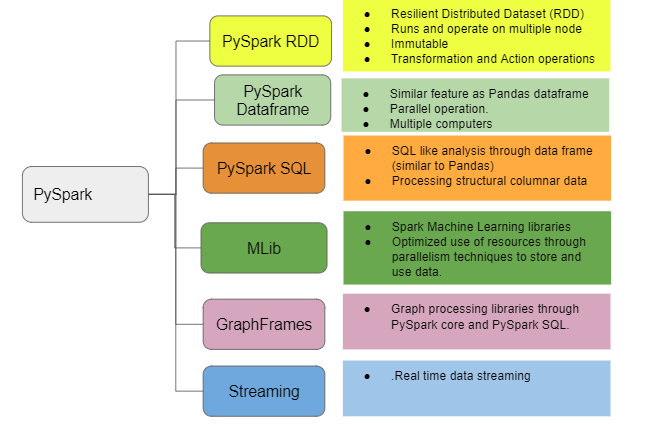